<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-эффективность-обогащения" data-toc-modified-id="Проверка-эффективность-обогащения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка эффективность обогащения</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки</a></span><ul class="toc-item"><li><span><a href="#Золото-Au" data-toc-modified-id="Золото-Au-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Золото Au</a></span></li><li><span><a href="#Серебро-Ag" data-toc-modified-id="Серебро-Ag-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Серебро Ag</a></span></li><li><span><a href="#Свинец-(Pb)" data-toc-modified-id="Свинец-(Pb)-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Свинец (Pb)</a></span></li></ul></li><li><span><a href="#Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределения размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ-на-разных-стадиях" data-toc-modified-id="Суммарная-концентрация-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE." data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE.</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
 
import numpy as np
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import  make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# обучающая выборка
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', parse_dates=['date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64       
 8   final.

In [3]:
# Тестовая выборка
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', parse_dates=['date'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5290 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5286 non-null   float64       
 2   primary_cleaner.input.depressant            5285 non-null   float64       
 3   primary_cleaner.input.feed_size             5290 non-null   float64       
 4   primary_cleaner.input.xanthate              5286 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64       
 9   primary_

In [4]:
# Исходные данные
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', parse_dates=['date'])
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19438 non-null  float64       
 2   final.output.concentrate_pb                         19438 non-null  float64       
 3   final.output.concentrate_sol                        19228 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19438 non-null  float64       
 7   final.output.tail_pb                                19338 non-null  float64       
 8   final.

### Проверка эффективность обогащения

Эффективность обогащения рассчитывается по формуле $$ Recovery = \cfrac{C*(F-T)}{F*(C_T)}*100$$
где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery

In [5]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery = (C*(F-T))/(F*(C-T))*100
print ('Рассчетная эффективность обогащения\n', recovery, '\n')
print('Табличная эффективность обогащения\n',df_train['rougher.output.recovery'])

Рассчетная эффективность обогащения
 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64 

Табличная эффективность обогащения
 0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Name: rougher.output.recovery, Length: 14149, dtype: float64


Значения рассчитаной и табличной эффективности идентичны. Проверим так ли это на протяжении всей таблицы при помощи метрики МАЕ.

In [6]:
print(mean_absolute_error(recovery, df_train['rougher.output.recovery']))

9.73512347450521e-15


MAE очень мало, следовательно эффективность обогащения рассчитана правильно

### Признаки, недоступные в тестовой выборке

Некоторые параметры, имеющиеся в обучающей выборке, отсутствуют в тестовой выборке, потому что замеряются и/или рассчитываются значительно позже. 

Посмотрим какие это параметры.

In [7]:
for i in range (len(df_train.columns)-len(df_test.columns)):
    print(list(set(df_train.columns) - set(df_test.columns))[i])
    
missing_columns = list(set(df_train.columns) - set(df_test.columns))

rougher.calculation.floatbank11_sulfate_to_au_feed
primary_cleaner.output.concentrate_sol
rougher.output.recovery
primary_cleaner.output.tail_ag
final.output.tail_pb
final.output.concentrate_ag
final.output.recovery
final.output.concentrate_au
rougher.output.tail_pb
secondary_cleaner.output.tail_pb
primary_cleaner.output.tail_pb
rougher.output.concentrate_ag
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
primary_cleaner.output.concentrate_au
final.output.tail_ag
rougher.calculation.sulfate_to_au_concentrate
final.output.tail_au
primary_cleaner.output.concentrate_ag
rougher.output.tail_ag
final.output.concentrate_sol
primary_cleaner.output.concentrate_pb
final.output.concentrate_pb
rougher.output.tail_au
rougher.calculation.au_pb_ratio
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.output.concentrate_pb
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.output.tail_sol
secondary_cleaner.output.tail_sol
rougher.output.concentrate_au
fina

В тестовой выборке все отсутствующие параметры - параметры продукта (output) и рассчетные параметры (calculation)

Признаки, недоступные в тестовом датафрейме мы получаем после флотации и обработки руды. Однако предсказания мы хотим получить до обработки, поэтому  при обучении модели следует удалить недоступные признаки из train.

### Предобработка данных

Проверим на наличие дубликатов и попусков.

In [8]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


In [9]:
print(df_test.isna().sum())
print(df_test.isna().sum().max())

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Пропусков немного, их можно удалить.

In [10]:
df_test = df_test.dropna()
df_test.isna().sum()

date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [11]:
pd.set_option('display.max_rows', None)
print(df_train.isna().sum())
pd.set_option('display.max_rows', 10)

date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

В столбце "secondary_cleaner.output.tail_sol" слишком много пропусков - их лучше заменить медианным значением.
В остальных колонках пропусков немного - их можно удалить.

In [12]:
df_train['secondary_cleaner.output.tail_sol'] = df_train['secondary_cleaner.output.tail_sol'].fillna(
        df_train['secondary_cleaner.output.tail_sol'].median())


df_train = df_train.dropna()
df_train.isna().sum()

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

По итогу предобработки: в столбцах нет дубликатов, пропуски удалены, в колонке "secondary_cleaner.output.tail_sol" пропуски заменены медианным значением.

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Этапы очистки
- rougher — флотация (обогащение)
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

#### Золото Au

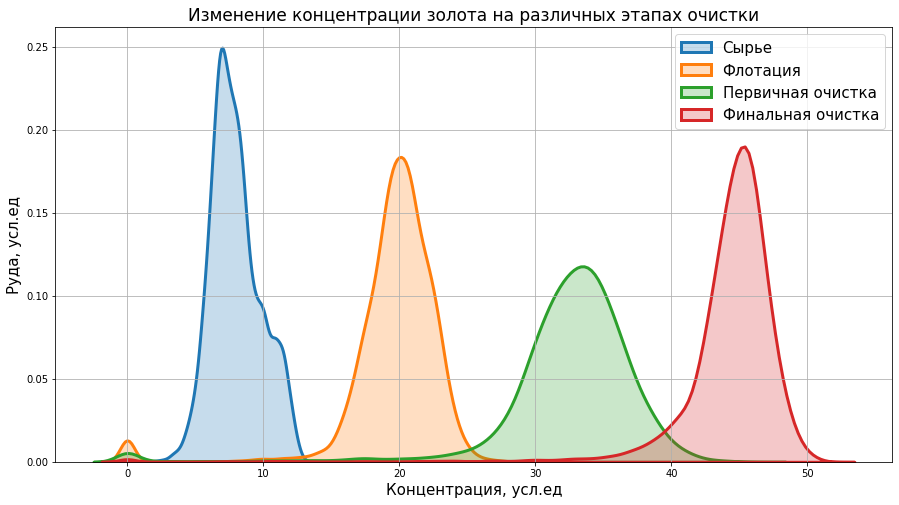

In [13]:
plt.figure(figsize=(15,8))

ax = sns.distplot(df_train['rougher.input.feed_au'], label='Сырье', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['rougher.output.concentrate_au'], label='Флотация', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['primary_cleaner.output.concentrate_au'], label='Первичная очистка', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['final.output.concentrate_au'], label='Финальная очистка', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})



plt.title('Изменение концентрации золота на различных этапах очистки', fontsize=17)
plt.grid(True)
ax.set_xlabel('Концентрация, усл.ед', fontsize=15)
ax.set_ylabel('Руда, усл.ед', fontsize=15)
plt.legend(fontsize=15)
plt.show()


#### Серебро Ag

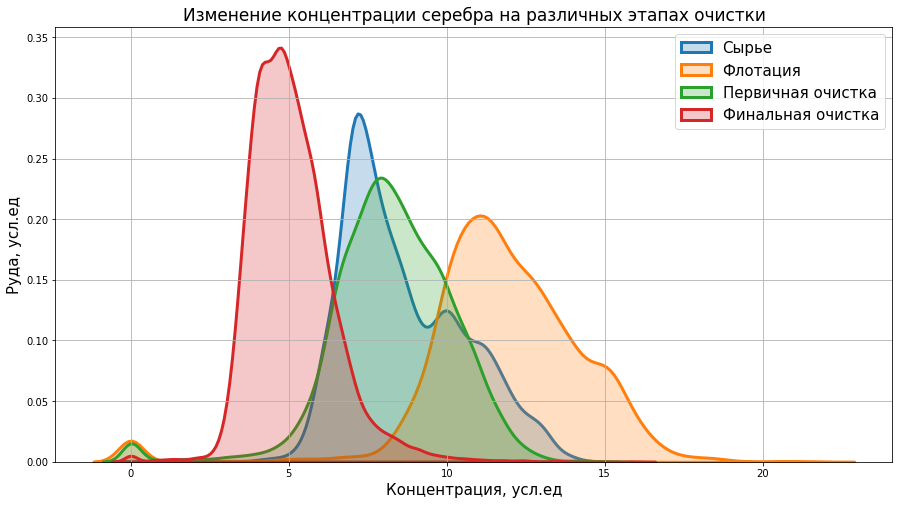

In [14]:
plt.figure(figsize=(15,8))

ax = sns.distplot(df_train['rougher.input.feed_ag'], label='Сырье', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['rougher.output.concentrate_ag'], label='Флотация', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['primary_cleaner.output.concentrate_ag'], label='Первичная очистка', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['final.output.concentrate_ag'], label='Финальная очистка', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})



plt.title('Изменение концентрации серебра на различных этапах очистки', fontsize=17)
plt.grid(True)
ax.set_xlabel('Концентрация, усл.ед', fontsize=15)
ax.set_ylabel('Руда, усл.ед', fontsize=15)
plt.legend(fontsize=15)
plt.show()

#### Свинец (Pb)

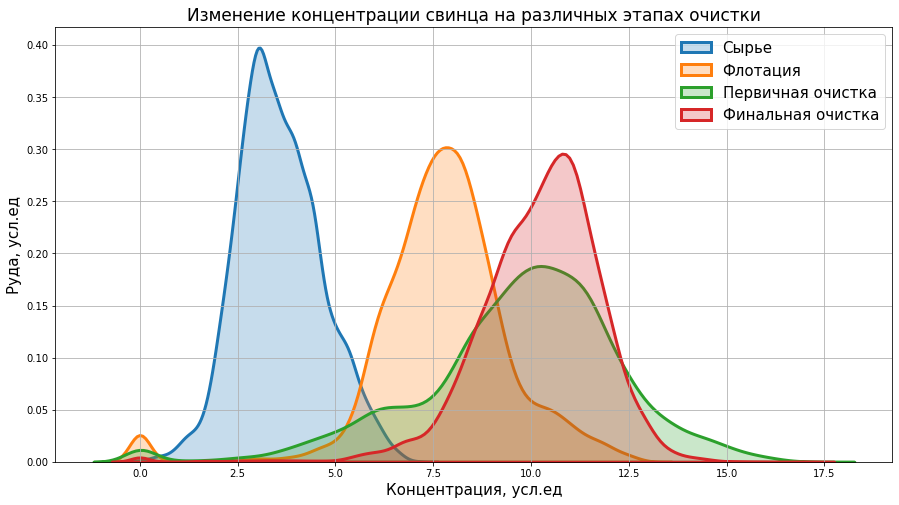

In [15]:
plt.figure(figsize=(15,8))

ax = sns.distplot(df_train['rougher.input.feed_pb'], label='Сырье', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['rougher.output.concentrate_pb'], label='Флотация', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['primary_cleaner.output.concentrate_pb'], label='Первичная очистка', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_train['final.output.concentrate_pb'], label='Финальная очистка', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})



plt.title('Изменение концентрации свинца на различных этапах очистки', fontsize=17)
plt.grid(True)
ax.set_xlabel('Концентрация, усл.ед', fontsize=15)
ax.set_ylabel('Руда, усл.ед', fontsize=15)
plt.legend(fontsize=15)
plt.show()

В процссе обработки металлов, графики концентрации становятся выше и уже. Это означает, что руда становится более однородной. 

На начльных этапах обработки заметен пик около нуля, который уменьшается с каждым этапом обработки. Вероятно, это сторонние материалы - грязь/вкрапления другой руды, от которых мы стремимся избавиться.

Также, можно заметить смещение пика концентрации вдоль оси (в сторону увеличения концентрации для золота и в стоону уменьшения концентрации для серебра) Это можно объяснить удалением фрагментов с низкой концентрацией ценных металлов в ходе обработки руды.

### Распределения размеров гранул сырья на обучающей и тестовой выборках

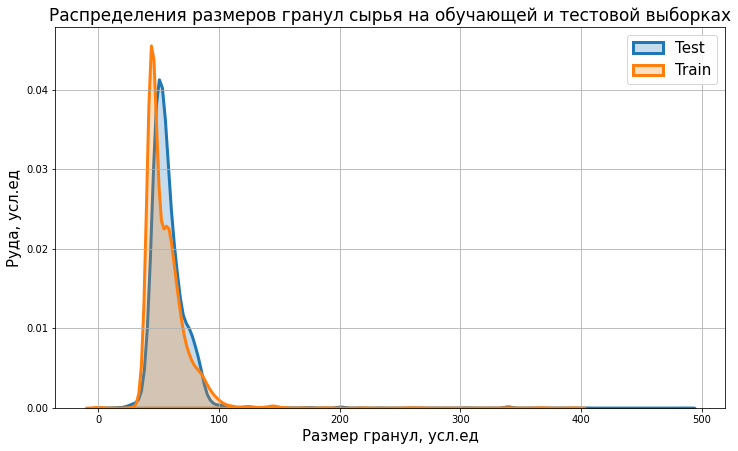

In [16]:
plt.figure(figsize=(12,7))

ax = sns.distplot(df_train['rougher.input.feed_size'], label='Test', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_test['rougher.input.feed_size'], label='Train', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Распределения размеров гранул сырья на обучающей и тестовой выборках', fontsize=17)
plt.grid(True)
ax.set_xlabel('Размер гранул, усл.ед', fontsize=15)
ax.set_ylabel('Руда, усл.ед', fontsize=15)
plt.legend(fontsize=15)
plt.show()

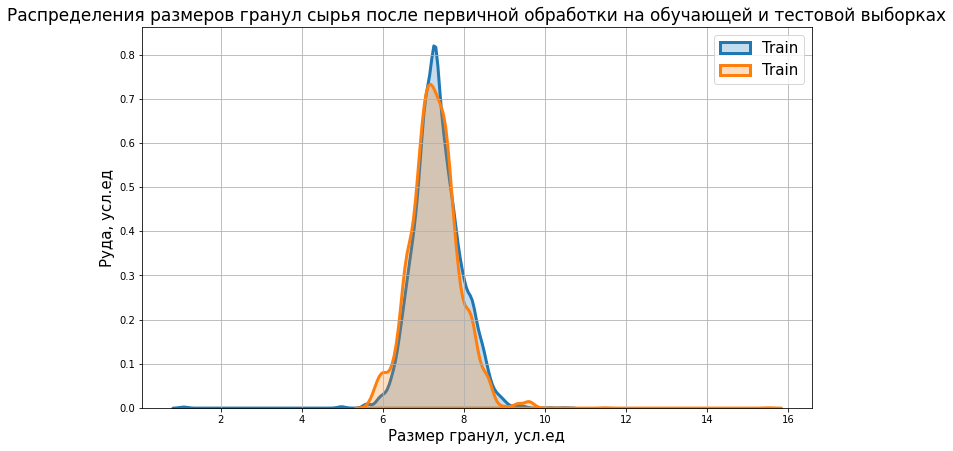

In [17]:
plt.figure(figsize=(12,7))

ax = sns.distplot(df_train['primary_cleaner.input.feed_size'], label='Train', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

sns.distplot(df_test['primary_cleaner.input.feed_size'], label='Train', hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Распределения размеров гранул сырья после первичной обработки на обучающей и тестовой выборках', fontsize=17)
plt.legend()
plt.grid(True)
ax.set_xlabel('Размер гранул, усл.ед', fontsize=15)
ax.set_ylabel('Руда, усл.ед', fontsize=15)
plt.legend(fontsize=15)
plt.show()

Размеры гранул сырья на обучающей и тестовой выборках почти совпадают как до, так и после превичной обработки.

### Суммарная концентрация всех веществ на разных стадиях

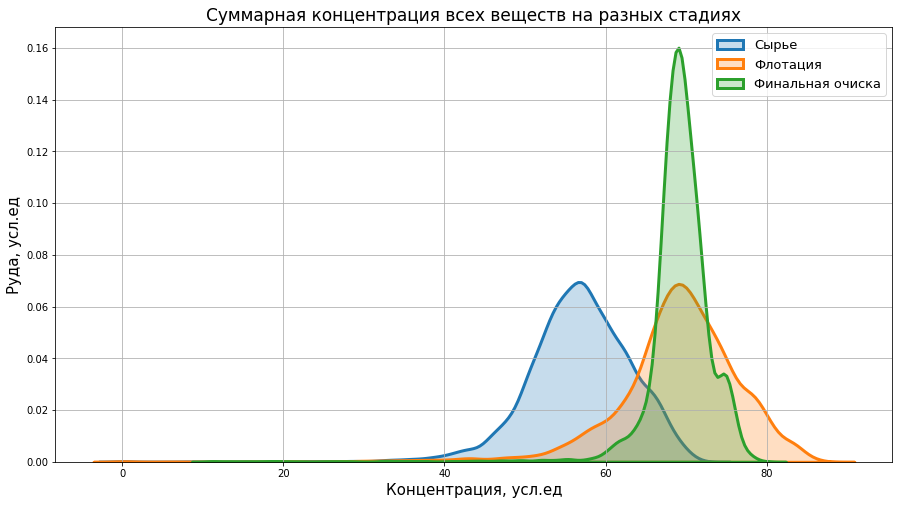

In [18]:
col = ['rougher.input.feed_au', 'rougher.input.feed_ag',
       'rougher.input.feed_pb','rougher.input.feed_sol',
       'rougher.output.concentrate_au', 'rougher.output.concentrate_ag',
       'rougher.input.feed_pb','rougher.output.concentrate_sol',
       'final.output.concentrate_au', 'final.output.concentrate_ag',
       'final.output.concentrate_pb', 'final.output.concentrate_sol']

for i in col:
    df_train = df_train.drop(df_train[df_train[i] == 0].index)

# Сырье
rougher_input_sum = (df_train['rougher.input.feed_au'] + 
                     df_train['rougher.input.feed_ag'] + 
                     df_train['rougher.input.feed_pb'] +
                    df_train['rougher.input.feed_sol'])
# Флотация
rougher_output_sum = (df_train['rougher.output.concentrate_au'] + 
                      df_train['rougher.output.concentrate_ag'] + 
                      df_train['rougher.output.concentrate_pb'] +
                      df_train['rougher.output.concentrate_sol'])

# Финальная очистка
final_sum = (df_train['final.output.concentrate_au'] + 
             df_train['final.output.concentrate_ag'] + 
             df_train['final.output.concentrate_pb'] +
             df_train['final.output.concentrate_sol'])


plt.figure(figsize=(15,8))
ax = sns.distplot(rougher_input_sum, label='Сырье',hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(rougher_output_sum, label='Флотация',hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(final_sum, label='Финальная очиска',hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Суммарная концентрация всех веществ на разных стадиях', fontsize=17)
plt.legend()
plt.grid(True)
ax.set_xlabel('Концентрация, усл.ед', fontsize=15)
ax.set_ylabel('Руда, усл.ед', fontsize=15)
plt.legend(fontsize=13)
plt.show()

Как уже описывалось выше, суммарная концентрация всех веществ повышается, по мере прохождения этапов очистки. 

В процссе обработки металлов, графики концентрации становятся выше и уже. Это означает, что руда становится более однородной. Размеры гранул сырья на обучающей и тестовой выборках почти совпадают как до, так и после превичной обработки. Суммарная концентрация всех веществ повышается, по мере прохождения этапов очистки. 

## Модель

### Функция для вычисления итоговой sMAPE.

Для проверки моделей будем испльзовать новую мтрику sMAPE. В отлмчме от MAE, она одинаково учитывает масштаб и целевого признака, и предсказания.

Для вычисления функции sMAPE используется функция

$$ sMAPE = \cfrac{1}{N} \sum_ {i = 1} ^ {N} \cfrac{|y_i-y_j|}{(|y_i|+|y_j|)/2}*100 $$

- y_i - Значение целевого признака
- y_j - Значение предсказания
- N - Количество объектов в выборке

$$Итог.sMAPE = 0.25*sMAPE(rougher)+0.75*sMAPE(final)$$

In [19]:
def smape(target, prediction):
    
    num = (abs(target - prediction)) / ((abs(target) + abs(prediction)) / 2)
    num = ((1 / len(num)) * num.sum()) * 100
    return (num)

def final_smape (rougher, final):
    return(.25*rougher + .75*final)

### Обучение моделей

Для сравнения используем 2 модели - модель дерева решений и модель случайного леса.

Целевые признаки:
- rougher.output.recovery 
- final.output.recovery

Добавим их из df_full в тренировочную и тестовую выборки.
Также, избавимся от столбцов, которые есть в тренировочнй, но отсутствуют в тестовой выборке

In [20]:
df_train.drop(missing_columns, axis=1, inplace=True)

train = df_train.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                        how = 'left', on = 'date')
test = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                        how = 'left', on = 'date')

# разделим на выборки
features_train = train.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_train = train[['rougher.output.recovery', 'final.output.recovery']]



features_test = test.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_test = test[['rougher.output.recovery','final.output.recovery']]




print(features_train.shape)
print(target_train.shape)
print(features_test.shape)
print(target_test.shape)

(12009, 52)
(12009, 2)
(5229, 52)
(5229, 2)


In [37]:
custom_score = make_scorer(smape, greater_is_better=False)

model_tree = make_pipeline(StandardScaler(),DecisionTreeRegressor(random_state=12))
model_forest = make_pipeline(StandardScaler(),RandomForestRegressor(random_state=12))

# GridSearchCV
params_tree = {'decisiontreeregressor__max_depth':range(1,15,2)}
params_forest = {'randomforestregressor__n_estimators':range(95,106,5),
             'randomforestregressor__max_depth':range(1,15,2)}

grid_rougher_tree = GridSearchCV(model_tree, param_grid = params_tree, scoring=custom_score)
grid_final_tree = GridSearchCV(model_tree, param_grid = params_tree, scoring=custom_score)

grid_rougher_forest = GridSearchCV(model_forest, param_grid = params_forest, scoring=custom_score)
grid_final_forest = GridSearchCV(model_forest, param_grid = params_forest, scoring=custom_score)

#обучение
grid_rougher_forest.fit(features_train, target_train['rougher.output.recovery'])
grid_final_forest.fit(features_train, target_train['final.output.recovery'])
grid_rougher_tree.fit(features_train, target_train['rougher.output.recovery'])
grid_final_tree.fit(features_train, target_train['final.output.recovery'])

print('Параметры лучших моделей\n')
print(grid_rougher_forest.best_params_)
print(grid_final_forest.best_params_)
print(grid_rougher_tree.best_params_)
print(grid_final_tree.best_params_)


Параметры лучших моделей

{'randomforestregressor__max_depth': 7, 'randomforestregressor__n_estimators': 100}
{'randomforestregressor__max_depth': 5, 'randomforestregressor__n_estimators': 95}
{'decisiontreeregressor__max_depth': 3}
{'decisiontreeregressor__max_depth': 1}


In [38]:
best_score_rougher_forest = grid_rougher_forest.best_score_
best_score_final_forest = grid_final_forest.best_score_
best_score_rougher_tree = grid_rougher_tree.best_score_
best_score_final_tree = grid_final_tree.best_score_

print('Целевой признак - rougher.output.recovery')
print('Решающее дерево',-best_score_rougher_tree,'Случайный лес',-best_score_rougher_forest)
print()
print('Целевой признак - final.output.recovery')
print('Решающее дерево',-best_score_final_tree,'Случайный лес',-best_score_final_forest)

Целевой признак - rougher.output.recovery
Решающее дерево 6.473694582912264 Случайный лес 6.086664923312943

Целевой признак - final.output.recovery
Решающее дерево 8.368920813952272 Случайный лес 8.25724687300091


Чем меньше best_score, тем лучше модель. Для каждого целевого признака, лучшая модель - Случайный лес.

In [40]:
print('sMAPE Решающего дерева:', -final_smape(best_score_rougher_tree, best_score_final_tree))
print('sMAPE Случайного леса:', -final_smape(best_score_rougher_forest, best_score_final_forest))

sMAPE Решающего дерева: 7.8951142561922705
sMAPE Случайного леса: 7.714601385578918


sMAPE Случайного леса меньше, чем Решающего дерева, что еще раз подтверждает правильность выбора Случайного леса в качестве лучшей модели.

### Проверка лучшей модели на тестовой выборке

Лучшая модель - случайный лес. Проверим ее на тестовой выборке.

In [44]:
rougher_test = grid_rougher_forest.predict(features_test)
final_test = grid_final_forest.predict(features_test)

smape_rogher = smape(target_test['rougher.output.recovery'],rougher_test)
smape_final =  smape(target_test['final.output.recovery'],final_test)
print('sMAPE Случайного леса на тестовой выборке:', final_smape(smape_rogher,smape_final))

sMAPE Случайного леса на тестовой выборке: 9.082756714909088


### Проверка модели на адекватность

Проверим модели на адекватность - сравним их с наивной моделью (в данном случае, с моделью, которая будет выдавать средние значения).

In [45]:
dr_mean = DummyRegressor(strategy="mean")

dr_mean.fit(features_train, target_train['rougher.output.recovery'])
rougher_predictions = dr_mean.predict(features_test)

dr_mean.fit(features_train, target_train['final.output.recovery'])
final_predictions = dr_mean.predict(features_test)

smape_rougher = smape(rougher_predictions, target_test['rougher.output.recovery'])
smape_final =  smape(final_predictions, target_test['final.output.recovery'])

print('sMAPE наивной модели', final_smape(smape_rougher,smape_final))

sMAPE наивной модели 9.20894972054075


sMAPE Случайного леса меньше, чем sMAPE наивной модели, что говорит об адекватности выбранной нами модели.

## Вывод

В ходе работы над проектом была проведена предобработка данных:
- Данные проврены на наличие дубликатов и пропусков
- В столбце secondary_cleaner.output.tail_sol пропуски заменены медианой
- В остальных столбцах пропуски удалены

Проведена проверка рассчета эффективности обогащения при помощи метрики MAE.  
Значение  MAE: 9.812685122965434e-15 - очень мало, что свидетельствует о правильности рассчета эффективности обогащения

Исследовани признаки, недоступные в тестоввой выборке. Все отсутствующие параметры - параметры продукта (output) и рассчетные параметры (calculation), которые будут замеряются и/или рассчитываются значительно позже.

Исследованы изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки (флотация, первичная очистка, финальная очистка).
В процссе обработки металлов, графики концентрации становятся выше и уже. Это означает, что руда становится более однородной.
На начльных этапах обработки заметен пик около нуля, который уменьшается с каждым этапом обработки. Вероятно, это сторонние материалы - грязь/вкрапления другой руды, от которых мы стремимся избавиться.
Также, можно заметить смещение пика концентрации вдоль оси (в сторону увеличения концентрации для золота и в стоону уменьшения концентрации для серебра) Это можно объяснить удалением фрагментов с низкой концентрацией ценных металлов в ходе обработки руды.

Исследование распределения размеров гранул сырья на обучающей и тестовой выборках показал, что размеры гранул сырья на обоих выборках почти совпадают.

Исследована суммарная концентрация всех веществ на разных стадиях. Суммарная концентрация всех веществ повышается, по мере прохождения этапов очистки.

Было проведено сравнение 2-х моделей:
- модель дерева решений 
- модель случайного леса

Целевые признаки:
- rougher.output.recovery 
- final.output.recovery

Качество моделей оценивалось при помощи кросс-валидации. Для лучших моделей:

Целевой признак - rougher.output.recovery
- Решающее дерево 6.473694582912264 
- Случайный лес 6.086664923312943

Целевой признак - final.output.recovery
- Решающее дерево 8.368920813952272  
- Случайный лес 8.25724687300091

Значения sMAPE:

- Решающее дерево: 7.8951142561922705
- Случайный лес: 7.714601385578918

sMAPE Случайного леса меньше, чем Решающего дерева, что еще раз подтверждает правильность выбора Случайного леса в качестве лучшей модели.

**Для каждого целевого признака, лучшая модель - Случайный лес.**

sMAPE Случайного леса на тестовой выборке: 9.082756714909088

Проведена проверка моделей на адекватность. Выполнено сравнение параметра sMAPE Случайного леса и наивной модели, предсказывающей среднее значение.
- sMAPE наивной модели 9.20894972054075

sMAPE Случайного леса меньше, чем sMAPE наивной модели, что говорит об адекватности выбранной нами модели.


